In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print ('Training size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Training size: 60000
Test size: 10000


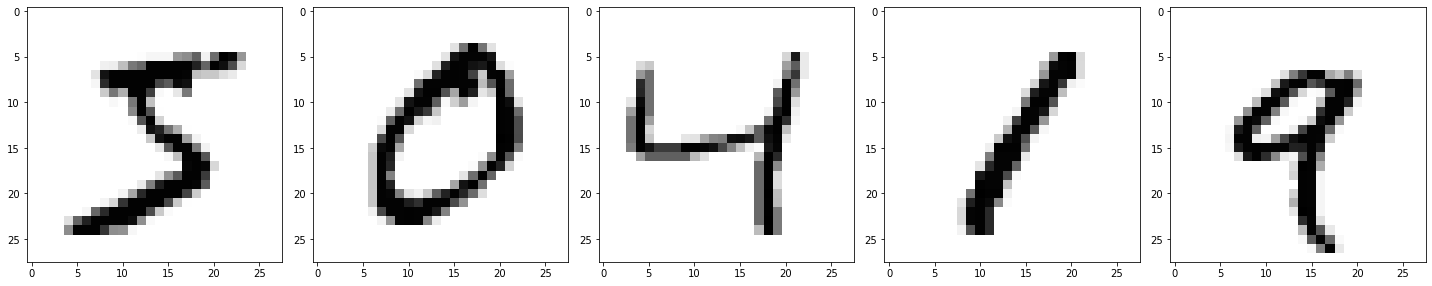

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(20,15))
axes = axes.flatten()
for img, ax in zip(x_train[:5].reshape((-1,28,28)), axes):
    ax.imshow(img, cmap="Greys")
plt.tight_layout()
plt.show()

In [4]:
x_train.shape[1]

784

In [5]:
num = 10

batch_size = 50
epochs = 6

In [6]:
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(784,)))
# model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(400, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.2))

# model.add(Activation('sigmoid'))
# model.add(Dense(10, activation='linear'))

model.add(Dense(num, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print (model.summary())

dense_1 (None, 784) ==> (None, 500)
dropout_1 (None, 500) ==> (None, 500)
dense_2 (None, 500) ==> (None, 400)
dropout_2 (None, 400) ==> (None, 400)
dense_3 (None, 400) ==> (None, 100)
dropout_3 (None, 100) ==> (None, 100)
dense_4 (None, 100) ==> (None, 10)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               200400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               40100 

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 13s 208us/step - loss: 0.0145 - accuracy: 0.9048 - val_loss: 0.0071 - val_accuracy: 0.9529
Epoch 2/6
60000/60000 [==============================] - 12s 196us/step - loss: 0.0061 - accuracy: 0.9610 - val_loss: 0.0048 - val_accuracy: 0.9692
Epoch 3/6
60000/60000 [==============================] - 12s 203us/step - loss: 0.0046 - accuracy: 0.9712 - val_loss: 0.0043 - val_accuracy: 0.9721
Epoch 4/6
60000/60000 [==============================] - 13s 217us/step - loss: 0.0037 - accuracy: 0.9762 - val_loss: 0.0039 - val_accuracy: 0.9759
Epoch 5/6
60000/60000 [==============================] - 12s 205us/step - loss: 0.0032 - accuracy: 0.9800 - val_loss: 0.0034 - val_accuracy: 0.9783
Epoch 6/6
10000/10000 [==============================] - 1s 69us/step
Test loss: 0.003
Test accuracy: 0.979


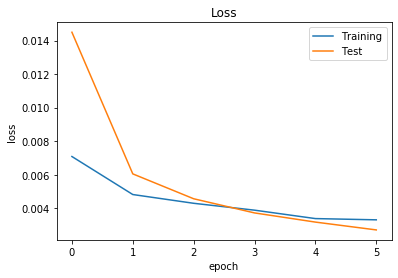

In [7]:
model.compile(loss='mean_squared_error', 
              optimizer=RMSprop(), metrics=['accuracy'])
    
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc= 'upper right')